# Aula10.Ex03 - A matriz View

### Primeiro, vamos importar as bibliotecas necessárias.
Verifique no código anterior um script para instalar as dependências necessárias (OpenGL e GLFW) antes de prosseguir.

In [357]:
import glfw
from OpenGL.GL import *
import OpenGL.GL.shaders
import numpy as np
import glm
import math

### Inicializando janela

In [358]:
glfw.init()
glfw.window_hint(glfw.VISIBLE, glfw.FALSE);
altura = 700
largura = 700
window = glfw.create_window(largura, altura, "Câmeras - Matriz View", None, None)
glfw.make_context_current(window)

### GLSL (OpenGL Shading Language)

Aqui veremos nosso primeiro código GLSL.

É uma linguagem de shading de alto nível baseada na linguagem de programação C.

Nós estamos escrevendo código GLSL como se "strings" de uma variável (mas podemos ler de arquivos texto). Esse código, depois, terá que ser compilado e linkado ao nosso programa. 

Iremos aprender GLSL conforme a necessidade do curso. Usarmos uma versão do GLSL mais antiga, compatível com muitos dispositivos.

### GLSL para Vertex Shader

No Pipeline programável, podemos interagir com Vertex Shaders.

No código abaixo, estamos fazendo o seguinte:

* Definindo uma variável chamada position do tipo vec3.
* Definindo matrizes Model, View e Projection que acumulam transformações geométricas 3D e permitem navegação no cenário.
* void main() é o ponto de entrada do nosso programa (função principal)
* gl_Position é uma variável especial do GLSL. Variáveis que começam com 'gl_' são desse tipo. Nesse caso, determina a posição de um vértice. Observe que todo vértice tem 4 coordenadas, por isso nós combinamos nossa variável vec2 com uma variável vec4. Além disso, nós modificamos nosso vetor com base nas transformações Model, View e Projection.

In [359]:
vertex_code = """
        attribute vec3 position;
                
        uniform mat4 model;
        uniform mat4 view;
        uniform mat4 projection;        
        
        void main(){
            gl_Position = projection * view * model * vec4(position,1.0);
        }
        """

### GLSL para Fragment Shader

No Pipeline programável, podemos interagir com Fragment Shaders.

No código abaixo, estamos fazendo o seguinte:

* void main() é o ponto de entrada do nosso programa (função principal)
* gl_FragColor é uma variável especial do GLSL. Variáveis que começam com 'gl_' são desse tipo. Nesse caso, determina a cor de um fragmento. Nesse caso é um ponto, mas poderia ser outro objeto (ponto, linha, triangulos, etc).

### Possibilitando modificar a cor.

Nos exemplos anteriores, a variável gl_FragColor estava definida de forma fixa (com cor R=0, G=0, B=0).

Agora, nós vamos criar uma variável do tipo "uniform", de quatro posições (vec4), para receber o dado de cor do nosso programa rodando em CPU.

In [360]:
fragment_code = """
        uniform vec4 color;
        void main(){
            gl_FragColor = color;
        }
        """

### Requisitando slot para a GPU para nossos programas Vertex e Fragment Shaders

In [361]:
# Request a program and shader slots from GPU
program  = glCreateProgram()
vertex   = glCreateShader(GL_VERTEX_SHADER)
fragment = glCreateShader(GL_FRAGMENT_SHADER)


### Associando nosso código-fonte aos slots solicitados

In [362]:
# Set shaders source
glShaderSource(vertex, vertex_code)
glShaderSource(fragment, fragment_code)

### Compilando o Vertex Shader

Se há algum erro em nosso programa Vertex Shader, nosso app para por aqui.

In [363]:
# Compile shaders
glCompileShader(vertex)
if not glGetShaderiv(vertex, GL_COMPILE_STATUS):
    error = glGetShaderInfoLog(vertex).decode()
    print(error)
    raise RuntimeError("Erro de compilacao do Vertex Shader")


### Compilando o Fragment Shader

Se há algum erro em nosso programa Fragment Shader, nosso app para por aqui.

In [364]:
glCompileShader(fragment)
if not glGetShaderiv(fragment, GL_COMPILE_STATUS):
    error = glGetShaderInfoLog(fragment).decode()
    print(error)
    raise RuntimeError("Erro de compilacao do Fragment Shader")

### Associando os programas compilado ao programa principal

In [365]:
# Attach shader objects to the program
glAttachShader(program, vertex)
glAttachShader(program, fragment)


### Linkagem do programa

In [366]:
# Build program
glLinkProgram(program)
if not glGetProgramiv(program, GL_LINK_STATUS):
    print(glGetProgramInfoLog(program))
    raise RuntimeError('Linking error')
    
# Make program the default program
glUseProgram(program)

### Preparando dados para enviar a GPU

Nesse momento, nós compilamos nossos Vertex e Program Shaders para que a GPU possa processá-los.

Por outro lado, as informações de vértices geralmente estão na CPU e devem ser transmitidas para a GPU.


### Modelando o objeto (Teapot)

In [367]:
vertices = np.zeros(1728, [("position", np.float32, 3)])

# Fonte: https://github.com/kretash/UtahTeapot/blob/master/teapot.h

In [368]:
vertices['position'] = [
(0.700000, -1.200000, 0.000000),
(0.605600, -1.200000, -0.355700),
(0.598800, -1.243700, -0.351700),
(0.598800, -1.243700, -0.351700),
(0.692100, -1.243700, 0.000000),
(0.700000, -1.200000, 0.000000),
(0.692100, -1.243700, 0.000000),
(0.598800, -1.243700, -0.351700),
(0.619600, -1.243700, -0.363900),
(0.619600, -1.243700, -0.363900),
(0.716200, -1.243700, 0.000000),
(0.692100, -1.243700, 0.000000),
(0.716200, -1.243700, 0.000000),
(0.619600, -1.243700, -0.363900),
(0.648900, -1.200000, -0.381100),
(0.648900, -1.200000, -0.381100),
(0.750000, -1.200000, 0.000000),
(0.716200, -1.243700, 0.000000),
(0.605600, -1.200000, -0.355700),
(0.355700, -1.200000, -0.605600),
(0.351700, -1.243700, -0.598800),
(0.351700, -1.243700, -0.598800),
(0.598800, -1.243700, -0.351700),
(0.605600, -1.200000, -0.355700),
(0.598800, -1.243700, -0.351700),
(0.351700, -1.243700, -0.598800),
(0.363900, -1.243800, -0.619600),
(0.363900, -1.243800, -0.619600),
(0.619600, -1.243700, -0.363900),
(0.598800, -1.243700, -0.351700),
(0.619600, -1.243700, -0.363900),
(0.363900, -1.243800, -0.619600),
(0.381100, -1.200000, -0.648900),
(0.381100, -1.200000, -0.648900),
(0.648900, -1.200000, -0.381100),
(0.619600, -1.243700, -0.363900),
(0.355700, -1.200000, -0.605600),
(0.000000, -1.200000, -0.700000),
(0.000000, -1.243700, -0.692100),
(0.000000, -1.243700, -0.692100),
(0.351700, -1.243700, -0.598800),
(0.355700, -1.200000, -0.605600),
(0.351700, -1.243700, -0.598800),
(0.000000, -1.243700, -0.692100),
(0.000000, -1.243800, -0.716200),
(0.000000, -1.243800, -0.716200),
(0.363900, -1.243800, -0.619600),
(0.351700, -1.243700, -0.598800),
(0.363900, -1.243800, -0.619600),
(0.000000, -1.243800, -0.716200),
(0.000000, -1.200000, -0.750000),
(0.000000, -1.200000, -0.750000),
(0.381100, -1.200000, -0.648900),
(0.363900, -1.243800, -0.619600),
(0.000000, -1.200000, -0.700000),
(-0.375700, -1.200000, -0.605600),
(-0.357600, -1.243700, -0.598800),
(-0.357600, -1.243700, -0.598800),
(0.000000, -1.243700, -0.692100),
(0.000000, -1.200000, -0.700000),
(0.000000, -1.243700, -0.692100),
(-0.357600, -1.243700, -0.598800),
(-0.364700, -1.243700, -0.619600),
(-0.364700, -1.243700, -0.619600),
(0.000000, -1.243800, -0.716200),
(0.000000, -1.243700, -0.692100),
(0.000000, -1.243800, -0.716200),
(-0.364700, -1.243700, -0.619600),
(-0.381100, -1.200000, -0.648900),
(-0.381100, -1.200000, -0.648900),
(0.000000, -1.200000, -0.750000),
(0.000000, -1.243800, -0.716200),
(-0.375700, -1.200000, -0.605600),
(-0.615600, -1.200000, -0.355700),
(-0.601800, -1.243700, -0.351700),
(-0.601800, -1.243700, -0.351700),
(-0.357600, -1.243700, -0.598800),
(-0.375700, -1.200000, -0.605600),
(-0.357600, -1.243700, -0.598800),
(-0.601800, -1.243700, -0.351700),
(-0.620000, -1.243700, -0.363900),
(-0.620000, -1.243700, -0.363900),
(-0.364700, -1.243700, -0.619600),
(-0.357600, -1.243700, -0.598800),
(-0.364700, -1.243700, -0.619600),
(-0.620000, -1.243700, -0.363900),
(-0.648900, -1.200000, -0.381100),
(-0.648900, -1.200000, -0.381100),
(-0.381100, -1.200000, -0.648900),
(-0.364700, -1.243700, -0.619600),
(-0.615600, -1.200000, -0.355700),
(-0.700000, -1.200000, 0.000000),
(-0.692100, -1.243700, 0.000000),
(-0.692100, -1.243700, 0.000000),
(-0.601800, -1.243700, -0.351700),
(-0.615600, -1.200000, -0.355700),
(-0.601800, -1.243700, -0.351700),
(-0.692100, -1.243700, 0.000000),
(-0.716200, -1.243700, 0.000000),
(-0.716200, -1.243700, 0.000000),
(-0.620000, -1.243700, -0.363900),
(-0.601800, -1.243700, -0.351700),
(-0.620000, -1.243700, -0.363900),
(-0.716200, -1.243700, 0.000000),
(-0.750000, -1.200000, 0.000000),
(-0.750000, -1.200000, 0.000000),
(-0.648900, -1.200000, -0.381100),
(-0.620000, -1.243700, -0.363900),
(-0.700000, -1.200000, 0.000000),
(-0.605600, -1.200000, 0.355700),
(-0.598800, -1.243700, 0.351700),
(-0.598800, -1.243700, 0.351700),
(-0.692100, -1.243700, 0.000000),
(-0.700000, -1.200000, 0.000000),
(-0.692100, -1.243700, 0.000000),
(-0.598800, -1.243700, 0.351700),
(-0.619600, -1.243700, 0.363900),
(-0.619600, -1.243700, 0.363900),
(-0.716200, -1.243700, 0.000000),
(-0.692100, -1.243700, 0.000000),
(-0.716200, -1.243700, 0.000000),
(-0.619600, -1.243700, 0.363900),
(-0.648900, -1.200000, 0.381100),
(-0.648900, -1.200000, 0.381100),
(-0.750000, -1.200000, 0.000000),
(-0.716200, -1.243700, 0.000000),
(-0.605600, -1.200000, 0.355700),
(-0.355700, -1.200000, 0.605600),
(-0.351700, -1.243700, 0.598800),
(-0.351700, -1.243700, 0.598800),
(-0.598800, -1.243700, 0.351700),
(-0.605600, -1.200000, 0.355700),
(-0.598800, -1.243700, 0.351700),
(-0.351700, -1.243700, 0.598800),
(-0.363900, -1.243700, 0.619600),
(-0.363900, -1.243700, 0.619600),
(-0.619600, -1.243700, 0.363900),
(-0.598800, -1.243700, 0.351700),
(-0.619600, -1.243700, 0.363900),
(-0.363900, -1.243700, 0.619600),
(-0.381100, -1.200000, 0.648900),
(-0.381100, -1.200000, 0.648900),
(-0.648900, -1.200000, 0.381100),
(-0.619600, -1.243700, 0.363900),
(-0.355700, -1.200000, 0.605600),
(0.000000, -1.200000, 0.700000),
(0.000000, -1.243700, 0.692100),
(0.000000, -1.243700, 0.692100),
(-0.351700, -1.243700, 0.598800),
(-0.355700, -1.200000, 0.605600),
(-0.351700, -1.243700, 0.598800),
(0.000000, -1.243700, 0.692100),
(0.000000, -1.243700, 0.716200),
(0.000000, -1.243700, 0.716200),
(-0.363900, -1.243700, 0.619600),
(-0.351700, -1.243700, 0.598800),
(-0.363900, -1.243700, 0.619600),
(0.000000, -1.243700, 0.716200),
(0.000000, -1.200000, 0.750000),
(0.000000, -1.200000, 0.750000),
(-0.381100, -1.200000, 0.648900),
(-0.363900, -1.243700, 0.619600),
(0.000000, -1.200000, 0.700000),
(0.355700, -1.200000, 0.605600),
(0.351700, -1.243700, 0.598800),
(0.351700, -1.243700, 0.598800),
(0.000000, -1.243700, 0.692100),
(0.000000, -1.200000, 0.700000),
(0.000000, -1.243700, 0.692100),
(0.351700, -1.243700, 0.598800),
(0.363900, -1.243700, 0.619600),
(0.363900, -1.243700, 0.619600),
(0.000000, -1.243700, 0.716200),
(0.000000, -1.243700, 0.692100),
(0.000000, -1.243700, 0.716200),
(0.363900, -1.243700, 0.619600),
(0.381100, -1.200000, 0.648900),
(0.381100, -1.200000, 0.648900),
(0.000000, -1.200000, 0.750000),
(0.000000, -1.243700, 0.716200),
(0.355700, -1.200000, 0.605600),
(0.605600, -1.200000, 0.355700),
(0.598800, -1.243700, 0.351700),
(0.598800, -1.243700, 0.351700),
(0.351700, -1.243700, 0.598800),
(0.355700, -1.200000, 0.605600),
(0.351700, -1.243700, 0.598800),
(0.598800, -1.243700, 0.351700),
(0.619600, -1.243700, 0.363900),
(0.619600, -1.243700, 0.363900),
(0.363900, -1.243700, 0.619600),
(0.351700, -1.243700, 0.598800),
(0.363900, -1.243700, 0.619600),
(0.619600, -1.243700, 0.363900),
(0.648900, -1.200000, 0.381100),
(0.648900, -1.200000, 0.381100),
(0.381100, -1.200000, 0.648900),
(0.363900, -1.243700, 0.619600),
(0.605600, -1.200000, 0.355700),
(0.700000, -1.200000, 0.000000),
(0.692100, -1.243700, 0.000000),
(0.692100, -1.243700, 0.000000),
(0.598800, -1.243700, 0.351700),
(0.605600, -1.200000, 0.355700),
(0.598800, -1.243700, 0.351700),
(0.692100, -1.243700, 0.000000),
(0.716200, -1.243700, 0.000000),
(0.716200, -1.243700, 0.000000),
(0.619600, -1.243700, 0.363900),
(0.598800, -1.243700, 0.351700),
(0.619600, -1.243700, 0.363900),
(0.716200, -1.243700, 0.000000),
(0.750000, -1.200000, 0.000000),
(0.750000, -1.200000, 0.000000),
(0.648900, -1.200000, 0.381100),
(0.619600, -1.243700, 0.363900),
(0.750000, -1.200000, 0.000000),
(0.648900, -1.200000, -0.381100),
(0.753000, -0.938900, -0.442300),
(0.753000, -0.938900, -0.442300),
(0.870400, -0.938900, 0.000000),
(0.750000, -1.200000, 0.000000),
(0.870400, -0.938900, 0.000000),
(0.753000, -0.938900, -0.442300),
(0.833100, -0.686100, -0.489300),
(0.833100, -0.686100, -0.489300),
(0.963000, -0.686100, 0.000000),
(0.870400, -0.938900, 0.000000),
(0.963000, -0.686100, 0.000000),
(0.833100, -0.686100, -0.489300),
(0.865200, -0.450000, -0.508100),
(0.865200, -0.450000, -0.508100),
(1.000000, -0.450000, 0.000000),
(0.963000, -0.686100, 0.000000),
(0.648900, -1.200000, -0.381100),
(0.381100, -1.200000, -0.648900),
(0.442300, -0.938900, -0.753000),
(0.442300, -0.938900, -0.753000),
(0.753000, -0.938900, -0.442300),
(0.648900, -1.200000, -0.381100),
(0.753000, -0.938900, -0.442300),
(0.442300, -0.938900, -0.753000),
(0.489300, -0.686100, -0.833100),
(0.489300, -0.686100, -0.833100),
(0.833100, -0.686100, -0.489300),
(0.753000, -0.938900, -0.442300),
(0.833100, -0.686100, -0.489300),
(0.489300, -0.686100, -0.833100),
(0.508100, -0.450000, -0.865200),
(0.508100, -0.450000, -0.865200),
(0.865200, -0.450000, -0.508100),
(0.833100, -0.686100, -0.489300),
(0.381100, -1.200000, -0.648900),
(0.000000, -1.200000, -0.750000),
(0.000000, -0.938900, -0.870400),
(0.000000, -0.938900, -0.870400),
(0.442300, -0.938900, -0.753000),
(0.381100, -1.200000, -0.648900),
(0.442300, -0.938900, -0.753000),
(0.000000, -0.938900, -0.870400),
(0.000000, -0.686100, -0.963000),
(0.000000, -0.686100, -0.963000),
(0.489300, -0.686100, -0.833100),
(0.442300, -0.938900, -0.753000),
(0.489300, -0.686100, -0.833100),
(0.000000, -0.686100, -0.963000),
(0.000000, -0.450000, -1.000000),
(0.000000, -0.450000, -1.000000),
(0.508100, -0.450000, -0.865200),
(0.489300, -0.686100, -0.833100),
(0.000000, -1.200000, -0.750000),
(-0.381100, -1.200000, -0.648900),
(-0.442300, -0.938900, -0.753000),
(-0.442300, -0.938900, -0.753000),
(0.000000, -0.938900, -0.870400),
(0.000000, -1.200000, -0.750000),
(0.000000, -0.938900, -0.870400),
(-0.442300, -0.938900, -0.753000),
(-0.489300, -0.686100, -0.833100),
(-0.489300, -0.686100, -0.833100),
(0.000000, -0.686100, -0.963000),
(0.000000, -0.938900, -0.870400),
(0.000000, -0.686100, -0.963000),
(-0.489300, -0.686100, -0.833100),
(-0.508100, -0.450000, -0.865200),
(-0.508100, -0.450000, -0.865200),
(0.000000, -0.450000, -1.000000),
(0.000000, -0.686100, -0.963000),
(-0.381100, -1.200000, -0.648900),
(-0.648900, -1.200000, -0.381100),
(-0.753000, -0.938900, -0.442300),
(-0.753000, -0.938900, -0.442300),
(-0.442300, -0.938900, -0.753000),
(-0.381100, -1.200000, -0.648900),
(-0.442300, -0.938900, -0.753000),
(-0.753000, -0.938900, -0.442300),
(-0.833100, -0.686100, -0.489300),
(-0.833100, -0.686100, -0.489300),
(-0.489300, -0.686100, -0.833100),
(-0.442300, -0.938900, -0.753000),
(-0.489300, -0.686100, -0.833100),
(-0.833100, -0.686100, -0.489300),
(-0.865200, -0.450000, -0.508100),
(-0.865200, -0.450000, -0.508100),
(-0.508100, -0.450000, -0.865200),
(-0.489300, -0.686100, -0.833100),
(-0.648900, -1.200000, -0.381100),
(-0.750000, -1.200000, 0.000000),
(-0.870400, -0.938900, 0.000000),
(-0.870400, -0.938900, 0.000000),
(-0.753000, -0.938900, -0.442300),
(-0.648900, -1.200000, -0.381100),
(-0.753000, -0.938900, -0.442300),
(-0.870400, -0.938900, 0.000000),
(-0.963000, -0.686100, 0.000000),
(-0.963000, -0.686100, 0.000000),
(-0.833100, -0.686100, -0.489300),
(-0.753000, -0.938900, -0.442300),
(-0.833100, -0.686100, -0.489300),
(-0.963000, -0.686100, 0.000000),
(-1.000000, -0.450000, 0.000000),
(-1.000000, -0.450000, 0.000000),
(-0.865200, -0.450000, -0.508100),
(-0.833100, -0.686100, -0.489300),
(-0.750000, -1.200000, 0.000000),
(-0.648900, -1.200000, 0.381100),
(-0.753000, -0.938900, 0.442300),
(-0.753000, -0.938900, 0.442300),
(-0.870400, -0.938900, 0.000000),
(-0.750000, -1.200000, 0.000000),
(-0.870400, -0.938900, 0.000000),
(-0.753000, -0.938900, 0.442300),
(-0.833100, -0.686100, 0.489300),
(-0.833100, -0.686100, 0.489300),
(-0.963000, -0.686100, 0.000000),
(-0.870400, -0.938900, 0.000000),
(-0.963000, -0.686100, 0.000000),
(-0.833100, -0.686100, 0.489300),
(-0.865200, -0.450000, 0.508100),
(-0.865200, -0.450000, 0.508100),
(-1.000000, -0.450000, 0.000000),
(-0.963000, -0.686100, 0.000000),
(-0.648900, -1.200000, 0.381100),
(-0.381100, -1.200000, 0.648900),
(-0.442300, -0.938900, 0.753000),
(-0.442300, -0.938900, 0.753000),
(-0.753000, -0.938900, 0.442300),
(-0.648900, -1.200000, 0.381100),
(-0.753000, -0.938900, 0.442300),
(-0.442300, -0.938900, 0.753000),
(-0.489300, -0.686100, 0.833100),
(-0.489300, -0.686100, 0.833100),
(-0.833100, -0.686100, 0.489300),
(-0.753000, -0.938900, 0.442300),
(-0.833100, -0.686100, 0.489300),
(-0.489300, -0.686100, 0.833100),
(-0.508100, -0.450000, 0.865200),
(-0.508100, -0.450000, 0.865200),
(-0.865200, -0.450000, 0.508100),
(-0.833100, -0.686100, 0.489300),
(-0.381100, -1.200000, 0.648900),
(0.000000, -1.200000, 0.750000),
(0.000000, -0.938900, 0.870400),
(0.000000, -0.938900, 0.870400),
(-0.442300, -0.938900, 0.753000),
(-0.381100, -1.200000, 0.648900),
(-0.442300, -0.938900, 0.753000),
(0.000000, -0.938900, 0.870400),
(0.000000, -0.686100, 0.963000),
(0.000000, -0.686100, 0.963000),
(-0.489300, -0.686100, 0.833100),
(-0.442300, -0.938900, 0.753000),
(-0.489300, -0.686100, 0.833100),
(0.000000, -0.686100, 0.963000),
(0.000000, -0.450000, 1.000000),
(0.000000, -0.450000, 1.000000),
(-0.508100, -0.450000, 0.865200),
(-0.489300, -0.686100, 0.833100),
(0.000000, -1.200000, 0.750000),
(0.381100, -1.200000, 0.648900),
(0.442300, -0.938900, 0.753000),
(0.442300, -0.938900, 0.753000),
(0.000000, -0.938900, 0.870400),
(0.000000, -1.200000, 0.750000),
(0.000000, -0.938900, 0.870400),
(0.442300, -0.938900, 0.753000),
(0.489300, -0.686100, 0.833100),
(0.489300, -0.686100, 0.833100),
(0.000000, -0.686100, 0.963000),
(0.000000, -0.938900, 0.870400),
(0.000000, -0.686100, 0.963000),
(0.489300, -0.686100, 0.833100),
(0.508100, -0.450000, 0.865200),
(0.508100, -0.450000, 0.865200),
(0.000000, -0.450000, 1.000000),
(0.000000, -0.686100, 0.963000),
(0.381100, -1.200000, 0.648900),
(0.648900, -1.200000, 0.381100),
(0.753000, -0.938900, 0.442300),
(0.753000, -0.938900, 0.442300),
(0.442300, -0.938900, 0.753000),
(0.381100, -1.200000, 0.648900),
(0.442300, -0.938900, 0.753000),
(0.753000, -0.938900, 0.442300),
(0.833100, -0.686100, 0.489300),
(0.833100, -0.686100, 0.489300),
(0.489300, -0.686100, 0.833100),
(0.442300, -0.938900, 0.753000),
(0.489300, -0.686100, 0.833100),
(0.833100, -0.686100, 0.489300),
(0.865200, -0.450000, 0.508100),
(0.865200, -0.450000, 0.508100),
(0.508100, -0.450000, 0.865200),
(0.489300, -0.686100, 0.833100),
(0.648900, -1.200000, 0.381100),
(0.750000, -1.200000, 0.000000),
(0.870400, -0.938900, 0.000000),
(0.870400, -0.938900, 0.000000),
(0.753000, -0.938900, 0.442300),
(0.648900, -1.200000, 0.381100),
(0.753000, -0.938900, 0.442300),
(0.870400, -0.938900, 0.000000),
(0.963000, -0.686100, 0.000000),
(0.963000, -0.686100, 0.000000),
(0.833100, -0.686100, 0.489300),
(0.753000, -0.938900, 0.442300),
(0.833100, -0.686100, 0.489300),
(0.963000, -0.686100, 0.000000),
(1.000000, -0.450000, 0.000000),
(1.000000, -0.450000, 0.000000),
(0.865200, -0.450000, 0.508100),
(0.833100, -0.686100, 0.489300),
(1.000000, -0.450000, 0.000000),
(0.865200, -0.450000, -0.508100),
(0.809100, -0.261100, -0.475200),
(0.809100, -0.261100, -0.475200),
(0.935200, -0.261100, 0.000000),
(1.000000, -0.450000, 0.000000),
(0.935200, -0.261100, 0.000000),
(0.809100, -0.261100, -0.475200),
(0.705000, -0.138900, -0.414000),
(0.705000, -0.138900, -0.414000),
(0.814800, -0.138900, 0.000000),
(0.935200, -0.261100, 0.000000),
(0.814800, -0.138900, 0.000000),
(0.705000, -0.138900, -0.414000),
(0.648900, -0.075000, -0.381100),
(0.648900, -0.075000, -0.381100),
(0.750000, -0.075000, 0.000000),
(0.814800, -0.138900, 0.000000),
(0.865200, -0.450000, -0.508100),
(0.508100, -0.450000, -0.865200),
(0.475200, -0.261100, -0.809100),
(0.475200, -0.261100, -0.809100),
(0.809100, -0.261100, -0.475200),
(0.865200, -0.450000, -0.508100),
(0.809100, -0.261100, -0.475200),
(0.475200, -0.261100, -0.809100),
(0.414000, -0.138900, -0.705000),
(0.414000, -0.138900, -0.705000),
(0.705000, -0.138900, -0.414000),
(0.809100, -0.261100, -0.475200),
(0.705000, -0.138900, -0.414000),
(0.414000, -0.138900, -0.705000),
(0.381100, -0.075000, -0.648900),
(0.381100, -0.075000, -0.648900),
(0.648900, -0.075000, -0.381100),
(0.705000, -0.138900, -0.414000),
(0.508100, -0.450000, -0.865200),
(0.000000, -0.450000, -1.000000),
(0.000000, -0.261100, -0.935200),
(0.000000, -0.261100, -0.935200),
(0.475200, -0.261100, -0.809100),
(0.508100, -0.450000, -0.865200),
(0.475200, -0.261100, -0.809100),
(0.000000, -0.261100, -0.935200),
(0.000000, -0.138900, -0.814800),
(0.000000, -0.138900, -0.814800),
(0.414000, -0.138900, -0.705000),
(0.475200, -0.261100, -0.809100),
(0.414000, -0.138900, -0.705000),
(0.000000, -0.138900, -0.814800),
(0.000000, -0.075000, -0.750000),
(0.000000, -0.075000, -0.750000),
(0.381100, -0.075000, -0.648900),
(0.414000, -0.138900, -0.705000),
(0.000000, -0.450000, -1.000000),
(-0.508100, -0.450000, -0.865200),
(-0.475200, -0.261100, -0.809100),
(-0.475200, -0.261100, -0.809100),
(0.000000, -0.261100, -0.935200),
(0.000000, -0.450000, -1.000000),
(0.000000, -0.261100, -0.935200),
(-0.475200, -0.261100, -0.809100),
(-0.414000, -0.138900, -0.705000),
(-0.414000, -0.138900, -0.705000),
(0.000000, -0.138900, -0.814800),
(0.000000, -0.261100, -0.935200),
(0.000000, -0.138900, -0.814800),
(-0.414000, -0.138900, -0.705000),
(-0.381100, -0.075000, -0.648900),
(-0.381100, -0.075000, -0.648900),
(0.000000, -0.075000, -0.750000),
(0.000000, -0.138900, -0.814800),
(-0.508100, -0.450000, -0.865200),
(-0.865200, -0.450000, -0.508100),
(-0.809100, -0.261100, -0.475200),
(-0.809100, -0.261100, -0.475200),
(-0.475200, -0.261100, -0.809100),
(-0.508100, -0.450000, -0.865200),
(-0.475200, -0.261100, -0.809100),
(-0.809100, -0.261100, -0.475200),
(-0.705000, -0.138900, -0.414000),
(-0.705000, -0.138900, -0.414000),
(-0.414000, -0.138900, -0.705000),
(-0.475200, -0.261100, -0.809100),
(-0.414000, -0.138900, -0.705000),
(-0.705000, -0.138900, -0.414000),
(-0.648900, -0.075000, -0.381100),
(-0.648900, -0.075000, -0.381100),
(-0.381100, -0.075000, -0.648900),
(-0.414000, -0.138900, -0.705000),
(-0.865200, -0.450000, -0.508100),
(-1.000000, -0.450000, 0.000000),
(-0.935200, -0.261100, 0.000000),
(-0.935200, -0.261100, 0.000000),
(-0.809100, -0.261100, -0.475200),
(-0.865200, -0.450000, -0.508100),
(-0.809100, -0.261100, -0.475200),
(-0.935200, -0.261100, 0.000000),
(-0.814800, -0.138900, 0.000000),
(-0.814800, -0.138900, 0.000000),
(-0.705000, -0.138900, -0.414000),
(-0.809100, -0.261100, -0.475200),
(-0.705000, -0.138900, -0.414000),
(-0.814800, -0.138900, 0.000000),
(-0.750000, -0.075000, 0.000000),
(-0.750000, -0.075000, 0.000000),
(-0.648900, -0.075000, -0.381100),
(-0.705000, -0.138900, -0.414000),
(-1.000000, -0.450000, 0.000000),
(-0.865200, -0.450000, 0.508100),
(-0.809100, -0.261100, 0.475200),
(-0.809100, -0.261100, 0.475200),
(-0.935200, -0.261100, 0.000000),
(-1.000000, -0.450000, 0.000000),
(-0.935200, -0.261100, 0.000000),
(-0.809100, -0.261100, 0.475200),
(-0.705000, -0.138900, 0.414000),
(-0.705000, -0.138900, 0.414000),
(-0.814800, -0.138900, 0.000000),
(-0.935200, -0.261100, 0.000000),
(-0.814800, -0.138900, 0.000000),
(-0.705000, -0.138900, 0.414000),
(-0.648900, -0.075000, 0.381100),
(-0.648900, -0.075000, 0.381100),
(-0.750000, -0.075000, 0.000000),
(-0.814800, -0.138900, 0.000000),
(-0.865200, -0.450000, 0.508100),
(-0.508100, -0.450000, 0.865200),
(-0.475200, -0.261100, 0.809100),
(-0.475200, -0.261100, 0.809100),
(-0.809100, -0.261100, 0.475200),
(-0.865200, -0.450000, 0.508100),
(-0.809100, -0.261100, 0.475200),
(-0.475200, -0.261100, 0.809100),
(-0.414000, -0.138900, 0.705000),
(-0.414000, -0.138900, 0.705000),
(-0.705000, -0.138900, 0.414000),
(-0.809100, -0.261100, 0.475200),
(-0.705000, -0.138900, 0.414000),
(-0.414000, -0.138900, 0.705000),
(-0.381100, -0.075000, 0.648900),
(-0.381100, -0.075000, 0.648900),
(-0.648900, -0.075000, 0.381100),
(-0.705000, -0.138900, 0.414000),
(-0.508100, -0.450000, 0.865200),
(0.000000, -0.450000, 1.000000),
(0.000000, -0.261100, 0.935200),
(0.000000, -0.261100, 0.935200),
(-0.475200, -0.261100, 0.809100),
(-0.508100, -0.450000, 0.865200),
(-0.475200, -0.261100, 0.809100),
(0.000000, -0.261100, 0.935200),
(0.000000, -0.138900, 0.814800),
(0.000000, -0.138900, 0.814800),
(-0.414000, -0.138900, 0.705000),
(-0.475200, -0.261100, 0.809100),
(-0.414000, -0.138900, 0.705000),
(0.000000, -0.138900, 0.814800),
(0.000000, -0.075000, 0.750000),
(0.000000, -0.075000, 0.750000),
(-0.381100, -0.075000, 0.648900),
(-0.414000, -0.138900, 0.705000),
(0.000000, -0.450000, 1.000000),
(0.508100, -0.450000, 0.865200),
(0.475200, -0.261100, 0.809100),
(0.475200, -0.261100, 0.809100),
(0.000000, -0.261100, 0.935200),
(0.000000, -0.450000, 1.000000),
(0.000000, -0.261100, 0.935200),
(0.475200, -0.261100, 0.809100),
(0.414000, -0.138900, 0.705000),
(0.414000, -0.138900, 0.705000),
(0.000000, -0.138900, 0.814800),
(0.000000, -0.261100, 0.935200),
(0.000000, -0.138900, 0.814800),
(0.414000, -0.138900, 0.705000),
(0.381100, -0.075000, 0.648900),
(0.381100, -0.075000, 0.648900),
(0.000000, -0.075000, 0.750000),
(0.000000, -0.138900, 0.814800),
(0.508100, -0.450000, 0.865200),
(0.865200, -0.450000, 0.508100),
(0.809100, -0.261100, 0.475200),
(0.809100, -0.261100, 0.475200),
(0.475200, -0.261100, 0.809100),
(0.508100, -0.450000, 0.865200),
(0.475200, -0.261100, 0.809100),
(0.809100, -0.261100, 0.475200),
(0.705000, -0.138900, 0.414000),
(0.705000, -0.138900, 0.414000),
(0.414000, -0.138900, 0.705000),
(0.475200, -0.261100, 0.809100),
(0.414000, -0.138900, 0.705000),
(0.705000, -0.138900, 0.414000),
(0.648900, -0.075000, 0.381100),
(0.648900, -0.075000, 0.381100),
(0.381100, -0.075000, 0.648900),
(0.414000, -0.138900, 0.705000),
(0.865200, -0.450000, 0.508100),
(1.000000, -0.450000, 0.000000),
(0.935200, -0.261100, 0.000000),
(0.935200, -0.261100, 0.000000),
(0.809100, -0.261100, 0.475200),
(0.865200, -0.450000, 0.508100),
(0.809100, -0.261100, 0.475200),
(0.935200, -0.261100, 0.000000),
(0.814800, -0.138900, 0.000000),
(0.814800, -0.138900, 0.000000),
(0.705000, -0.138900, 0.414000),
(0.809100, -0.261100, 0.475200),
(0.705000, -0.138900, 0.414000),
(0.814800, -0.138900, 0.000000),
(0.750000, -0.075000, 0.000000),
(0.750000, -0.075000, 0.000000),
(0.648900, -0.075000, 0.381100),
(0.705000, -0.138900, 0.414000),
(0.750000, -0.075000, 0.000000),
(0.648900, -0.075000, -0.381100),
(0.617600, -0.038900, -0.362800),
(0.617600, -0.038900, -0.362800),
(0.713900, -0.038900, 0.000000),
(0.750000, -0.075000, 0.000000),
(0.713900, -0.038900, 0.000000),
(0.617600, -0.038900, -0.362800),
(0.442200, -0.011100, -0.259700),
(0.442200, -0.011100, -0.259700),
(0.511100, -0.011100, 0.000000),
(0.713900, -0.038900, 0.000000),
(0.511100, -0.011100, 0.000000),
(0.442200, -0.011100, -0.259700),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.511100, -0.011100, 0.000000),
(0.648900, -0.075000, -0.381100),
(0.381100, -0.075000, -0.648900),
(0.362800, -0.038900, -0.617600),
(0.362800, -0.038900, -0.617600),
(0.617600, -0.038900, -0.362800),
(0.648900, -0.075000, -0.381100),
(0.617600, -0.038900, -0.362800),
(0.362800, -0.038900, -0.617600),
(0.259700, -0.011100, -0.442200),
(0.259700, -0.011100, -0.442200),
(0.442200, -0.011100, -0.259700),
(0.617600, -0.038900, -0.362800),
(0.442200, -0.011100, -0.259700),
(0.259700, -0.011100, -0.442200),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.442200, -0.011100, -0.259700),
(0.381100, -0.075000, -0.648900),
(0.000000, -0.075000, -0.750000),
(0.000000, -0.038900, -0.713900),
(0.000000, -0.038900, -0.713900),
(0.362800, -0.038900, -0.617600),
(0.381100, -0.075000, -0.648900),
(0.362800, -0.038900, -0.617600),
(0.000000, -0.038900, -0.713900),
(0.000000, -0.011100, -0.511100),
(0.000000, -0.011100, -0.511100),
(0.259700, -0.011100, -0.442200),
(0.362800, -0.038900, -0.617600),
(0.259700, -0.011100, -0.442200),
(0.000000, -0.011100, -0.511100),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.259700, -0.011100, -0.442200),
(0.000000, -0.075000, -0.750000),
(-0.381100, -0.075000, -0.648900),
(-0.362800, -0.038900, -0.617600),
(-0.362800, -0.038900, -0.617600),
(0.000000, -0.038900, -0.713900),
(0.000000, -0.075000, -0.750000),
(0.000000, -0.038900, -0.713900),
(-0.362800, -0.038900, -0.617600),
(-0.259700, -0.011100, -0.442200),
(-0.259700, -0.011100, -0.442200),
(0.000000, -0.011100, -0.511100),
(0.000000, -0.038900, -0.713900),
(0.000000, -0.011100, -0.511100),
(-0.259700, -0.011100, -0.442200),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, -0.011100, -0.511100),
(-0.381100, -0.075000, -0.648900),
(-0.648900, -0.075000, -0.381100),
(-0.617600, -0.038900, -0.362800),
(-0.617600, -0.038900, -0.362800),
(-0.362800, -0.038900, -0.617600),
(-0.381100, -0.075000, -0.648900),
(-0.362800, -0.038900, -0.617600),
(-0.617600, -0.038900, -0.362800),
(-0.442200, -0.011100, -0.259700),
(-0.442200, -0.011100, -0.259700),
(-0.259700, -0.011100, -0.442200),
(-0.362800, -0.038900, -0.617600),
(-0.259700, -0.011100, -0.442200),
(-0.442200, -0.011100, -0.259700),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(-0.259700, -0.011100, -0.442200),
(-0.648900, -0.075000, -0.381100),
(-0.750000, -0.075000, 0.000000),
(-0.713900, -0.038900, 0.000000),
(-0.713900, -0.038900, 0.000000),
(-0.617600, -0.038900, -0.362800),
(-0.648900, -0.075000, -0.381100),
(-0.617600, -0.038900, -0.362800),
(-0.713900, -0.038900, 0.000000),
(-0.511100, -0.011100, 0.000000),
(-0.511100, -0.011100, 0.000000),
(-0.442200, -0.011100, -0.259700),
(-0.617600, -0.038900, -0.362800),
(-0.442200, -0.011100, -0.259700),
(-0.511100, -0.011100, 0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(-0.442200, -0.011100, -0.259700),
(-0.750000, -0.075000, 0.000000),
(-0.648900, -0.075000, 0.381100),
(-0.617600, -0.038900, 0.362800),
(-0.617600, -0.038900, 0.362800),
(-0.713900, -0.038900, 0.000000),
(-0.750000, -0.075000, 0.000000),
(-0.713900, -0.038900, 0.000000),
(-0.617600, -0.038900, 0.362800),
(-0.442200, -0.011100, 0.259700),
(-0.442200, -0.011100, 0.259700),
(-0.511100, -0.011100, 0.000000),
(-0.713900, -0.038900, 0.000000),
(-0.511100, -0.011100, 0.000000),
(-0.442200, -0.011100, 0.259700),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(-0.511100, -0.011100, 0.000000),
(-0.648900, -0.075000, 0.381100),
(-0.381100, -0.075000, 0.648900),
(-0.362800, -0.038900, 0.617600),
(-0.362800, -0.038900, 0.617600),
(-0.617600, -0.038900, 0.362800),
(-0.648900, -0.075000, 0.381100),
(-0.617600, -0.038900, 0.362800),
(-0.362800, -0.038900, 0.617600),
(-0.259700, -0.011100, 0.442200),
(-0.259700, -0.011100, 0.442200),
(-0.442200, -0.011100, 0.259700),
(-0.617600, -0.038900, 0.362800),
(-0.442200, -0.011100, 0.259700),
(-0.259700, -0.011100, 0.442200),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(-0.442200, -0.011100, 0.259700),
(-0.381100, -0.075000, 0.648900),
(0.000000, -0.075000, 0.750000),
(0.000000, -0.038900, 0.713900),
(0.000000, -0.038900, 0.713900),
(-0.362800, -0.038900, 0.617600),
(-0.381100, -0.075000, 0.648900),
(-0.362800, -0.038900, 0.617600),
(0.000000, -0.038900, 0.713900),
(0.000000, -0.011100, 0.511100),
(0.000000, -0.011100, 0.511100),
(-0.259700, -0.011100, 0.442200),
(-0.362800, -0.038900, 0.617600),
(-0.259700, -0.011100, 0.442200),
(0.000000, -0.011100, 0.511100),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(-0.259700, -0.011100, 0.442200),
(0.000000, -0.075000, 0.750000),
(0.381100, -0.075000, 0.648900),
(0.362800, -0.038900, 0.617600),
(0.362800, -0.038900, 0.617600),
(0.000000, -0.038900, 0.713900),
(0.000000, -0.075000, 0.750000),
(0.000000, -0.038900, 0.713900),
(0.362800, -0.038900, 0.617600),
(0.259700, -0.011100, 0.442200),
(0.259700, -0.011100, 0.442200),
(0.000000, -0.011100, 0.511100),
(0.000000, -0.038900, 0.713900),
(0.000000, -0.011100, 0.511100),
(0.259700, -0.011100, 0.442200),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, -0.011100, 0.511100),
(0.381100, -0.075000, 0.648900),
(0.648900, -0.075000, 0.381100),
(0.617600, -0.038900, 0.362800),
(0.617600, -0.038900, 0.362800),
(0.362800, -0.038900, 0.617600),
(0.381100, -0.075000, 0.648900),
(0.362800, -0.038900, 0.617600),
(0.617600, -0.038900, 0.362800),
(0.442200, -0.011100, 0.259700),
(0.442200, -0.011100, 0.259700),
(0.259700, -0.011100, 0.442200),
(0.362800, -0.038900, 0.617600),
(0.259700, -0.011100, 0.442200),
(0.442200, -0.011100, 0.259700),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.259700, -0.011100, 0.442200),
(0.648900, -0.075000, 0.381100),
(0.750000, -0.075000, 0.000000),
(0.713900, -0.038900, 0.000000),
(0.713900, -0.038900, 0.000000),
(0.617600, -0.038900, 0.362800),
(0.648900, -0.075000, 0.381100),
(0.617600, -0.038900, 0.362800),
(0.713900, -0.038900, 0.000000),
(0.511100, -0.011100, 0.000000),
(0.511100, -0.011100, 0.000000),
(0.442200, -0.011100, 0.259700),
(0.617600, -0.038900, 0.362800),
(0.442200, -0.011100, 0.259700),
(0.511100, -0.011100, 0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.000000, 0.000000, -0.000000),
(0.442200, -0.011100, 0.259700),
(-0.800000, -1.012500, 0.000000),
(-0.787000, -1.041700, -0.100000),
(-1.115900, -1.036400, -0.100000),
(-1.115900, -1.036400, -0.100000),
(-1.098100, -1.008300, 0.000000),
(-0.800000, -1.012500, 0.000000),
(-1.098100, -1.008300, 0.000000),
(-1.115900, -1.036400, -0.100000),
(-1.319300, -0.999700, -0.100000),
(-1.319300, -0.999700, -0.100000),
(-1.285200, -0.979200, 0.000000),
(-1.098100, -1.008300, 0.000000),
(-1.285200, -0.979200, 0.000000),
(-1.319300, -0.999700, -0.100000),
(-1.388900, -0.900000, -0.100000),
(-1.388900, -0.900000, -0.100000),
(-1.350000, -0.900000, 0.000000),
(-1.285200, -0.979200, 0.000000),
(-0.787000, -1.041700, -0.100000),
(-0.763000, -1.095800, -0.100000),
(-1.148900, -1.088600, -0.100000),
(-1.148900, -1.088600, -0.100000),
(-1.115900, -1.036400, -0.100000),
(-0.787000, -1.041700, -0.100000),
(-1.115900, -1.036400, -0.100000),
(-1.148900, -1.088600, -0.100000),
(-1.382600, -1.037800, -0.100000),
(-1.382600, -1.037800, -0.100000),
(-1.319300, -0.999700, -0.100000),
(-1.115900, -1.036400, -0.100000),
(-1.319300, -0.999700, -0.100000),
(-1.382600, -1.037800, -0.100000),
(-1.461100, -0.900000, -0.100000),
(-1.461100, -0.900000, -0.100000),
(-1.388900, -0.900000, -0.100000),
(-1.319300, -0.999700, -0.100000),
(-0.763000, -1.095800, -0.100000),
(-0.750000, -1.125000, 0.000000),
(-1.166700, -1.116700, 0.000000),
(-1.166700, -1.116700, 0.000000),
(-1.148900, -1.088600, -0.100000),
(-0.763000, -1.095800, -0.100000),
(-1.148900, -1.088600, -0.100000),
(-1.166700, -1.116700, 0.000000),
(-1.416700, -1.058300, 0.000000),
(-1.416700, -1.058300, 0.000000),
(-1.382600, -1.037800, -0.100000),
(-1.148900, -1.088600, -0.100000),
(-1.382600, -1.037800, -0.100000),
(-1.416700, -1.058300, 0.000000),
(-1.500000, -0.900000, 0.000000),
(-1.500000, -0.900000, 0.000000),
(-1.461100, -0.900000, -0.100000),
(-1.382600, -1.037800, -0.100000),
(-0.750000, -1.125000, 0.000000),
(-0.763000, -1.095800, 0.100000),
(-1.148900, -1.088600, 0.100000),
(-1.148900, -1.088600, 0.100000),
(-1.166700, -1.116700, 0.000000),
(-0.750000, -1.125000, 0.000000),
(-1.166700, -1.116700, 0.000000),
(-1.148900, -1.088600, 0.100000),
(-1.382600, -1.037800, 0.100000),
(-1.382600, -1.037800, 0.100000),
(-1.416700, -1.058300, 0.000000),
(-1.166700, -1.116700, 0.000000),
(-1.416700, -1.058300, 0.000000),
(-1.382600, -1.037800, 0.100000),
(-1.461100, -0.900000, 0.100000),
(-1.461100, -0.900000, 0.100000),
(-1.500000, -0.900000, 0.000000),
(-1.416700, -1.058300, 0.000000),
(-0.763000, -1.095800, 0.100000),
(-0.787000, -1.041700, 0.100000),
(-1.115900, -1.036400, 0.100000),
(-1.115900, -1.036400, 0.100000),
(-1.148900, -1.088600, 0.100000),
(-0.763000, -1.095800, 0.100000),
(-1.148900, -1.088600, 0.100000),
(-1.115900, -1.036400, 0.100000),
(-1.319300, -0.999700, 0.100000),
(-1.319300, -0.999700, 0.100000),
(-1.382600, -1.037800, 0.100000),
(-1.148900, -1.088600, 0.100000),
(-1.382600, -1.037800, 0.100000),
(-1.319300, -0.999700, 0.100000),
(-1.388900, -0.900000, 0.100000),
(-1.388900, -0.900000, 0.100000),
(-1.461100, -0.900000, 0.100000),
(-1.382600, -1.037800, 0.100000),
(-0.787000, -1.041700, 0.100000),
(-0.800000, -1.012500, 0.000000),
(-1.098100, -1.008300, 0.000000),
(-1.098100, -1.008300, 0.000000),
(-1.115900, -1.036400, 0.100000),
(-0.787000, -1.041700, 0.100000),
(-1.115900, -1.036400, 0.100000),
(-1.098100, -1.008300, 0.000000),
(-1.285200, -0.979200, 0.000000),
(-1.285200, -0.979200, 0.000000),
(-1.319300, -0.999700, 0.100000),
(-1.115900, -1.036400, 0.100000),
(-1.319300, -0.999700, 0.100000),
(-1.285200, -0.979200, 0.000000),
(-1.350000, -0.900000, 0.000000),
(-1.350000, -0.900000, 0.000000),
(-1.388900, -0.900000, 0.100000),
(-1.319300, -0.999700, 0.100000),
(-1.350000, -0.900000, 0.000000),
(-1.388900, -0.900000, -0.100000),
(-1.347500, -0.738500, -0.100000),
(-1.347500, -0.738500, -0.100000),
(-1.314800, -0.758300, 0.000000),
(-1.350000, -0.900000, 0.000000),
(-1.314800, -0.758300, 0.000000),
(-1.347500, -0.738500, -0.100000),
(-1.216700, -0.562900, -0.100000),
(-1.216700, -0.562900, -0.100000),
(-1.201900, -0.591700, 0.000000),
(-1.314800, -0.758300, 0.000000),
(-1.201900, -0.591700, 0.000000),
(-1.216700, -0.562900, -0.100000),
(-0.987000, -0.411100, -0.100000),
(-0.987000, -0.411100, -0.100000),
(-1.000000, -0.450000, 0.000000),
(-1.201900, -0.591700, 0.000000),
(-1.388900, -0.900000, -0.100000),
(-1.461100, -0.900000, -0.100000),
(-1.408100, -0.701700, -0.100000),
(-1.408100, -0.701700, -0.100000),
(-1.347500, -0.738500, -0.100000),
(-1.388900, -0.900000, -0.100000),
(-1.347500, -0.738500, -0.100000),
(-1.408100, -0.701700, -0.100000),
(-1.244400, -0.509400, -0.100000),
(-1.244400, -0.509400, -0.100000),
(-1.216700, -0.562900, -0.100000),
(-1.347500, -0.738500, -0.100000),
(-1.216700, -0.562900, -0.100000),
(-1.244400, -0.509400, -0.100000),
(-0.963000, -0.338900, -0.100000),
(-0.963000, -0.338900, -0.100000),
(-0.987000, -0.411100, -0.100000),
(-1.216700, -0.562900, -0.100000),
(-1.461100, -0.900000, -0.100000),
(-1.500000, -0.900000, 0.000000),
(-1.440700, -0.681900, 0.000000),
(-1.440700, -0.681900, 0.000000),
(-1.408100, -0.701700, -0.100000),
(-1.461100, -0.900000, -0.100000),
(-1.408100, -0.701700, -0.100000),
(-1.440700, -0.681900, 0.000000),
(-1.259300, -0.480600, 0.000000),
(-1.259300, -0.480600, 0.000000),
(-1.244400, -0.509400, -0.100000),
(-1.408100, -0.701700, -0.100000),
(-1.244400, -0.509400, -0.100000),
(-1.259300, -0.480600, 0.000000),
(-0.950000, -0.300000, 0.000000),
(-0.950000, -0.300000, 0.000000),
(-0.963000, -0.338900, -0.100000),
(-1.244400, -0.509400, -0.100000),
(-1.500000, -0.900000, 0.000000),
(-1.461100, -0.900000, 0.100000),
(-1.408100, -0.701700, 0.100000),
(-1.408100, -0.701700, 0.100000),
(-1.440700, -0.681900, 0.000000),
(-1.500000, -0.900000, 0.000000),
(-1.440700, -0.681900, 0.000000),
(-1.408100, -0.701700, 0.100000),
(-1.244400, -0.509400, 0.100000),
(-1.244400, -0.509400, 0.100000),
(-1.259300, -0.480600, 0.000000),
(-1.440700, -0.681900, 0.000000),
(-1.259300, -0.480600, 0.000000),
(-1.244400, -0.509400, 0.100000),
(-0.963000, -0.338900, 0.100000),
(-0.963000, -0.338900, 0.100000),
(-0.950000, -0.300000, 0.000000),
(-1.259300, -0.480600, 0.000000),
(-1.461100, -0.900000, 0.100000),
(-1.388900, -0.900000, 0.100000),
(-1.347500, -0.738500, 0.100000),
(-1.347500, -0.738500, 0.100000),
(-1.408100, -0.701700, 0.100000),
(-1.461100, -0.900000, 0.100000),
(-1.408100, -0.701700, 0.100000),
(-1.347500, -0.738500, 0.100000),
(-1.216700, -0.562900, 0.100000),
(-1.216700, -0.562900, 0.100000),
(-1.244400, -0.509400, 0.100000),
(-1.408100, -0.701700, 0.100000),
(-1.244400, -0.509400, 0.100000),
(-1.216700, -0.562900, 0.100000),
(-0.987000, -0.411100, 0.100000),
(-0.987000, -0.411100, 0.100000),
(-0.963000, -0.338900, 0.100000),
(-1.244400, -0.509400, 0.100000),
(-1.388900, -0.900000, 0.100000),
(-1.350000, -0.900000, 0.000000),
(-1.314800, -0.758300, 0.000000),
(-1.314800, -0.758300, 0.000000),
(-1.347500, -0.738500, 0.100000),
(-1.388900, -0.900000, 0.100000),
(-1.347500, -0.738500, 0.100000),
(-1.314800, -0.758300, 0.000000),
(-1.201900, -0.591700, 0.000000),
(-1.201900, -0.591700, 0.000000),
(-1.216700, -0.562900, 0.100000),
(-1.347500, -0.738500, 0.100000),
(-1.216700, -0.562900, 0.100000),
(-1.201900, -0.591700, 0.000000),
(-1.000000, -0.450000, 0.000000),
(-1.000000, -0.450000, 0.000000),
(-0.987000, -0.411100, 0.100000),
(-1.216700, -0.562900, 0.100000),
(0.850000, -0.712500, 0.000000),
(0.850000, -0.605600, -0.220000),
(1.169800, -0.737100, -0.184600),
(1.169800, -0.737100, -0.184600),
(1.135200, -0.805600, 0.000000),
(0.850000, -0.712500, 0.000000),
(1.135200, -0.805600, 0.000000),
(1.169800, -0.737100, -0.184600),
(1.274700, -0.981400, -0.118800),
(1.274700, -0.981400, -0.118800),
(1.231500, -1.006900, 0.000000),
(1.135200, -0.805600, 0.000000),
(1.231500, -1.006900, 0.000000),
(1.274700, -0.981400, -0.118800),
(1.427800, -1.200000, -0.083300),
(1.427800, -1.200000, -0.083300),
(1.350000, -1.200000, 0.000000),
(1.231500, -1.006900, 0.000000),
(0.850000, -0.605600, -0.220000),
(0.850000, -0.406900, -0.220000),
(1.234000, -0.610100, -0.184600),
(1.234000, -0.610100, -0.184600),
(1.169800, -0.737100, -0.184600),
(0.850000, -0.605600, -0.220000),
(1.169800, -0.737100, -0.184600),
(1.234000, -0.610100, -0.184600),
(1.354900, -0.933900, -0.118800),
(1.354900, -0.933900, -0.118800),
(1.274700, -0.981400, -0.118800),
(1.169800, -0.737100, -0.184600),
(1.274700, -0.981400, -0.118800),
(1.354900, -0.933900, -0.118800),
(1.572200, -1.200000, -0.083300),
(1.572200, -1.200000, -0.083300),
(1.427800, -1.200000, -0.083300),
(1.274700, -0.981400, -0.118800),
(0.850000, -0.406900, -0.220000),
(0.850000, -0.300000, 0.000000),
(1.268500, -0.541700, 0.000000),
(1.268500, -0.541700, 0.000000),
(1.234000, -0.610100, -0.184600),
(0.850000, -0.406900, -0.220000),
(1.234000, -0.610100, -0.184600),
(1.268500, -0.541700, 0.000000),
(1.398100, -0.908300, 0.000000),
(1.398100, -0.908300, 0.000000),
(1.354900, -0.933900, -0.118800),
(1.234000, -0.610100, -0.184600),
(1.354900, -0.933900, -0.118800),
(1.398100, -0.908300, 0.000000),
(1.650000, -1.200000, 0.000000),
(1.650000, -1.200000, 0.000000),
(1.572200, -1.200000, -0.083300),
(1.354900, -0.933900, -0.118800),
(0.850000, -0.300000, 0.000000),
(0.850000, -0.406900, 0.220000),
(1.234000, -0.610100, 0.184600),
(1.234000, -0.610100, 0.184600),
(1.268500, -0.541700, 0.000000),
(0.850000, -0.300000, 0.000000),
(1.268500, -0.541700, 0.000000),
(1.234000, -0.610100, 0.184600),
(1.354900, -0.933900, 0.118800),
(1.354900, -0.933900, 0.118800),
(1.398100, -0.908300, 0.000000),
(1.268500, -0.541700, 0.000000),
(1.398100, -0.908300, 0.000000),
(1.354900, -0.933900, 0.118800),
(1.572200, -1.200000, 0.083300),
(1.572200, -1.200000, 0.083300),
(1.650000, -1.200000, 0.000000),
(1.398100, -0.908300, 0.000000),
(0.850000, -0.406900, 0.220000),
(0.850000, -0.605600, 0.220000),
(1.169800, -0.737100, 0.184600),
(1.169800, -0.737100, 0.184600),
(1.234000, -0.610100, 0.184600),
(0.850000, -0.406900, 0.220000),
(1.234000, -0.610100, 0.184600),
(1.169800, -0.737100, 0.184600),
(1.274700, -0.981400, 0.118800),
(1.274700, -0.981400, 0.118800),
(1.354900, -0.933900, 0.118800),
(1.234000, -0.610100, 0.184600),
(1.354900, -0.933900, 0.118800),
(1.274700, -0.981400, 0.118800),
(1.427800, -1.200000, 0.083300),
(1.427800, -1.200000, 0.083300),
(1.572200, -1.200000, 0.083300),
(1.354900, -0.933900, 0.118800),
(0.850000, -0.605600, 0.220000),
(0.850000, -0.712500, 0.000000),
(1.135200, -0.805600, 0.000000),
(1.135200, -0.805600, 0.000000),
(1.169800, -0.737100, 0.184600),
(0.850000, -0.605600, 0.220000),
(1.169800, -0.737100, 0.184600),
(1.135200, -0.805600, 0.000000),
(1.231500, -1.006900, 0.000000),
(1.231500, -1.006900, 0.000000),
(1.274700, -0.981400, 0.118800),
(1.169800, -0.737100, 0.184600),
(1.274700, -0.981400, 0.118800),
(1.231500, -1.006900, 0.000000),
(1.350000, -1.200000, 0.000000),
(1.350000, -1.200000, 0.000000),
(1.427800, -1.200000, 0.083300),
(1.274700, -0.981400, 0.118800),
(1.350000, -1.200000, 0.000000),
(1.427800, -1.200000, -0.083300),
(1.478900, -1.227200, -0.074700),
(1.478900, -1.227200, -0.074700),
(1.396300, -1.225000, 0.000000),
(1.350000, -1.200000, 0.000000),
(1.396300, -1.225000, 0.000000),
(1.478900, -1.227200, -0.074700),
(1.491200, -1.227700, -0.058600),
(1.491200, -1.227700, -0.058600),
(1.420400, -1.225000, 0.000000),
(1.396300, -1.225000, 0.000000),
(1.420400, -1.225000, 0.000000),
(1.491200, -1.227700, -0.058600),
(1.451900, -1.200000, -0.050000),
(1.451900, -1.200000, -0.050000),
(1.400000, -1.200000, 0.000000),
(1.420400, -1.225000, 0.000000),
(1.427800, -1.200000, -0.083300),
(1.572200, -1.200000, -0.083300),
(1.632200, -1.231200, -0.074700),
(1.632200, -1.231200, -0.074700),
(1.478900, -1.227200, -0.074700),
(1.427800, -1.200000, -0.083300),
(1.478900, -1.227200, -0.074700),
(1.632200, -1.231200, -0.074700),
(1.622700, -1.232700, -0.058600),
(1.622700, -1.232700, -0.058600),
(1.491200, -1.227700, -0.058600),
(1.478900, -1.227200, -0.074700),
(1.491200, -1.227700, -0.058600),
(1.622700, -1.232700, -0.058600),
(1.548100, -1.200000, -0.050000),
(1.548100, -1.200000, -0.050000),
(1.451900, -1.200000, -0.050000),
(1.491200, -1.227700, -0.058600),
(1.572200, -1.200000, -0.083300),
(1.650000, -1.200000, 0.000000),
(1.714800, -1.233300, 0.000000),
(1.714800, -1.233300, 0.000000),
(1.632200, -1.231200, -0.074700),
(1.572200, -1.200000, -0.083300),
(1.632200, -1.231200, -0.074700),
(1.714800, -1.233300, 0.000000),
(1.693500, -1.235400, 0.000000),
(1.693500, -1.235400, 0.000000),
(1.622700, -1.232700, -0.058600),
(1.632200, -1.231200, -0.074700),
(1.622700, -1.232700, -0.058600),
(1.693500, -1.235400, 0.000000),
(1.600000, -1.200000, 0.000000),
(1.600000, -1.200000, 0.000000),
(1.548100, -1.200000, -0.050000),
(1.622700, -1.232700, -0.058600),
(1.650000, -1.200000, 0.000000),
(1.572200, -1.200000, 0.083300),
(1.632200, -1.231200, 0.074700),
(1.632200, -1.231200, 0.074700),
(1.714800, -1.233300, 0.000000),
(1.650000, -1.200000, 0.000000),
(1.714800, -1.233300, 0.000000),
(1.632200, -1.231200, 0.074700),
(1.622700, -1.232700, 0.058600),
(1.622700, -1.232700, 0.058600),
(1.693500, -1.235400, 0.000000),
(1.714800, -1.233300, 0.000000),
(1.693500, -1.235400, 0.000000),
(1.622700, -1.232700, 0.058600),
(1.548100, -1.200000, 0.050000),
(1.548100, -1.200000, 0.050000),
(1.600000, -1.200000, 0.000000),
(1.693500, -1.235400, 0.000000),
(1.572200, -1.200000, 0.083300),
(1.427800, -1.200000, 0.083300),
(1.478900, -1.227200, 0.074700),
(1.478900, -1.227200, 0.074700),
(1.632200, -1.231200, 0.074700),
(1.572200, -1.200000, 0.083300),
(1.632200, -1.231200, 0.074700),
(1.478900, -1.227200, 0.074700),
(1.491200, -1.227700, 0.058600),
(1.491200, -1.227700, 0.058600),
(1.622700, -1.232700, 0.058600),
(1.632200, -1.231200, 0.074700),
(1.622700, -1.232700, 0.058600),
(1.491200, -1.227700, 0.058600),
(1.451900, -1.200000, 0.050000),
(1.451900, -1.200000, 0.050000),
(1.548100, -1.200000, 0.050000),
(1.622700, -1.232700, 0.058600),
(1.427800, -1.200000, 0.083300),
(1.350000, -1.200000, 0.000000),
(1.396300, -1.225000, 0.000000),
(1.396300, -1.225000, 0.000000),
(1.478900, -1.227200, 0.074700),
(1.427800, -1.200000, 0.083300),
(1.478900, -1.227200, 0.074700),
(1.396300, -1.225000, 0.000000),
(1.420400, -1.225000, 0.000000),
(1.420400, -1.225000, 0.000000),
(1.491200, -1.227700, 0.058600),
(1.478900, -1.227200, 0.074700),
(1.491200, -1.227700, 0.058600),
(1.420400, -1.225000, 0.000000),
(1.400000, -1.200000, 0.000000),
(1.400000, -1.200000, 0.000000),
(1.451900, -1.200000, 0.050000),
(1.491200, -1.227700, 0.058600),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.157100, -1.533300, -0.092400),
(0.157100, -1.533300, -0.092400),
(0.181500, -1.533300, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.181500, -1.533300, 0.000000),
(0.157100, -1.533300, -0.092400),
(0.102600, -1.441700, -0.060300),
(0.102600, -1.441700, -0.060300),
(0.118500, -1.441700, 0.000000),
(0.181500, -1.533300, 0.000000),
(0.118500, -1.441700, 0.000000),
(0.102600, -1.441700, -0.060300),
(0.086500, -1.350000, -0.050800),
(0.086500, -1.350000, -0.050800),
(0.100000, -1.350000, 0.000000),
(0.118500, -1.441700, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.092400, -1.533300, -0.157100),
(0.092400, -1.533300, -0.157100),
(0.157100, -1.533300, -0.092400),
(0.000000, -1.575000, 0.000000),
(0.157100, -1.533300, -0.092400),
(0.092400, -1.533300, -0.157100),
(0.060300, -1.441700, -0.102600),
(0.060300, -1.441700, -0.102600),
(0.102600, -1.441700, -0.060300),
(0.157100, -1.533300, -0.092400),
(0.102600, -1.441700, -0.060300),
(0.060300, -1.441700, -0.102600),
(0.050800, -1.350000, -0.086500),
(0.050800, -1.350000, -0.086500),
(0.086500, -1.350000, -0.050800),
(0.102600, -1.441700, -0.060300),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.533300, -0.181500),
(0.000000, -1.533300, -0.181500),
(0.092400, -1.533300, -0.157100),
(0.000000, -1.575000, 0.000000),
(0.092400, -1.533300, -0.157100),
(0.000000, -1.533300, -0.181500),
(0.000000, -1.441700, -0.118500),
(0.000000, -1.441700, -0.118500),
(0.060300, -1.441700, -0.102600),
(0.092400, -1.533300, -0.157100),
(0.060300, -1.441700, -0.102600),
(0.000000, -1.441700, -0.118500),
(0.000000, -1.350000, -0.100000),
(0.000000, -1.350000, -0.100000),
(0.050800, -1.350000, -0.086500),
(0.060300, -1.441700, -0.102600),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(-0.092400, -1.533300, -0.157100),
(-0.092400, -1.533300, -0.157100),
(0.000000, -1.533300, -0.181500),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.533300, -0.181500),
(-0.092400, -1.533300, -0.157100),
(-0.060300, -1.441700, -0.102600),
(-0.060300, -1.441700, -0.102600),
(0.000000, -1.441700, -0.118500),
(0.000000, -1.533300, -0.181500),
(0.000000, -1.441700, -0.118500),
(-0.060300, -1.441700, -0.102600),
(-0.050800, -1.350000, -0.086500),
(-0.050800, -1.350000, -0.086500),
(0.000000, -1.350000, -0.100000),
(0.000000, -1.441700, -0.118500),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(-0.157100, -1.533300, -0.092400),
(-0.157100, -1.533300, -0.092400),
(-0.092400, -1.533300, -0.157100),
(0.000000, -1.575000, 0.000000),
(-0.092400, -1.533300, -0.157100),
(-0.157100, -1.533300, -0.092400),
(-0.102600, -1.441700, -0.060300),
(-0.102600, -1.441700, -0.060300),
(-0.060300, -1.441700, -0.102600),
(-0.092400, -1.533300, -0.157100),
(-0.060300, -1.441700, -0.102600),
(-0.102600, -1.441700, -0.060300),
(-0.086500, -1.350000, -0.050800),
(-0.086500, -1.350000, -0.050800),
(-0.050800, -1.350000, -0.086500),
(-0.060300, -1.441700, -0.102600),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(-0.181500, -1.533300, 0.000000),
(-0.181500, -1.533300, 0.000000),
(-0.157100, -1.533300, -0.092400),
(0.000000, -1.575000, 0.000000),
(-0.157100, -1.533300, -0.092400),
(-0.181500, -1.533300, 0.000000),
(-0.118500, -1.441700, 0.000000),
(-0.118500, -1.441700, 0.000000),
(-0.102600, -1.441700, -0.060300),
(-0.157100, -1.533300, -0.092400),
(-0.102600, -1.441700, -0.060300),
(-0.118500, -1.441700, 0.000000),
(-0.100000, -1.350000, 0.000000),
(-0.100000, -1.350000, 0.000000),
(-0.086500, -1.350000, -0.050800),
(-0.102600, -1.441700, -0.060300),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(-0.157100, -1.533300, 0.092400),
(-0.157100, -1.533300, 0.092400),
(-0.181500, -1.533300, 0.000000),
(0.000000, -1.575000, 0.000000),
(-0.181500, -1.533300, 0.000000),
(-0.157100, -1.533300, 0.092400),
(-0.102600, -1.441700, 0.060300),
(-0.102600, -1.441700, 0.060300),
(-0.118500, -1.441700, 0.000000),
(-0.181500, -1.533300, 0.000000),
(-0.118500, -1.441700, 0.000000),
(-0.102600, -1.441700, 0.060300),
(-0.086500, -1.350000, 0.050800),
(-0.086500, -1.350000, 0.050800),
(-0.100000, -1.350000, 0.000000),
(-0.118500, -1.441700, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(-0.092400, -1.533300, 0.157100),
(-0.092400, -1.533300, 0.157100),
(-0.157100, -1.533300, 0.092400),
(0.000000, -1.575000, 0.000000),
(-0.157100, -1.533300, 0.092400),
(-0.092400, -1.533300, 0.157100),
(-0.060300, -1.441700, 0.102600),
(-0.060300, -1.441700, 0.102600),
(-0.102600, -1.441700, 0.060300),
(-0.157100, -1.533300, 0.092400),
(-0.102600, -1.441700, 0.060300),
(-0.060300, -1.441700, 0.102600),
(-0.050800, -1.350000, 0.086500),
(-0.050800, -1.350000, 0.086500),
(-0.086500, -1.350000, 0.050800),
(-0.102600, -1.441700, 0.060300),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.533300, 0.181500),
(0.000000, -1.533300, 0.181500),
(-0.092400, -1.533300, 0.157100),
(0.000000, -1.575000, 0.000000),
(-0.092400, -1.533300, 0.157100),
(0.000000, -1.533300, 0.181500),
(0.000000, -1.441700, 0.118500),
(0.000000, -1.441700, 0.118500),
(-0.060300, -1.441700, 0.102600),
(-0.092400, -1.533300, 0.157100),
(-0.060300, -1.441700, 0.102600),
(0.000000, -1.441700, 0.118500),
(0.000000, -1.350000, 0.100000),
(0.000000, -1.350000, 0.100000),
(-0.050800, -1.350000, 0.086500),
(-0.060300, -1.441700, 0.102600),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.092400, -1.533300, 0.157100),
(0.092400, -1.533300, 0.157100),
(0.000000, -1.533300, 0.181500),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.533300, 0.181500),
(0.092400, -1.533300, 0.157100),
(0.060300, -1.441700, 0.102600),
(0.060300, -1.441700, 0.102600),
(0.000000, -1.441700, 0.118500),
(0.000000, -1.533300, 0.181500),
(0.000000, -1.441700, 0.118500),
(0.060300, -1.441700, 0.102600),
(0.050800, -1.350000, 0.086500),
(0.050800, -1.350000, 0.086500),
(0.000000, -1.350000, 0.100000),
(0.000000, -1.441700, 0.118500),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.157100, -1.533300, 0.092400),
(0.157100, -1.533300, 0.092400),
(0.092400, -1.533300, 0.157100),
(0.000000, -1.575000, 0.000000),
(0.092400, -1.533300, 0.157100),
(0.157100, -1.533300, 0.092400),
(0.102600, -1.441700, 0.060300),
(0.102600, -1.441700, 0.060300),
(0.060300, -1.441700, 0.102600),
(0.092400, -1.533300, 0.157100),
(0.060300, -1.441700, 0.102600),
(0.102600, -1.441700, 0.060300),
(0.086500, -1.350000, 0.050800),
(0.086500, -1.350000, 0.050800),
(0.050800, -1.350000, 0.086500),
(0.060300, -1.441700, 0.102600),
(0.000000, -1.575000, 0.000000),
(0.000000, -1.575000, 0.000000),
(0.181500, -1.533300, 0.000000),
(0.181500, -1.533300, 0.000000),
(0.157100, -1.533300, 0.092400),
(0.000000, -1.575000, 0.000000),
(0.157100, -1.533300, 0.092400),
(0.181500, -1.533300, 0.000000),
(0.118500, -1.441700, 0.000000),
(0.118500, -1.441700, 0.000000),
(0.102600, -1.441700, 0.060300),
(0.157100, -1.533300, 0.092400),
(0.102600, -1.441700, 0.060300),
(0.118500, -1.441700, 0.000000),
(0.100000, -1.350000, 0.000000),
(0.100000, -1.350000, 0.000000),
(0.086500, -1.350000, 0.050800),
(0.102600, -1.441700, 0.060300),
(0.100000, -1.350000, 0.000000),
(0.086500, -1.350000, -0.050800),
(0.248300, -1.294400, -0.145900),
(0.248300, -1.294400, -0.145900),
(0.287000, -1.294400, 0.000000),
(0.100000, -1.350000, 0.000000),
(0.287000, -1.294400, 0.000000),
(0.248300, -1.294400, -0.145900),
(0.458200, -1.255600, -0.269100),
(0.458200, -1.255600, -0.269100),
(0.529600, -1.255600, 0.000000),
(0.287000, -1.294400, 0.000000),
(0.529600, -1.255600, 0.000000),
(0.458200, -1.255600, -0.269100),
(0.562400, -1.200000, -0.330300),
(0.562400, -1.200000, -0.330300),
(0.650000, -1.200000, 0.000000),
(0.529600, -1.255600, 0.000000),
(0.086500, -1.350000, -0.050800),
(0.050800, -1.350000, -0.086500),
(0.145900, -1.294400, -0.248300),
(0.145900, -1.294400, -0.248300),
(0.248300, -1.294400, -0.145900),
(0.086500, -1.350000, -0.050800),
(0.248300, -1.294400, -0.145900),
(0.145900, -1.294400, -0.248300),
(0.269100, -1.255600, -0.458200),
(0.269100, -1.255600, -0.458200),
(0.458200, -1.255600, -0.269100),
(0.248300, -1.294400, -0.145900),
(0.458200, -1.255600, -0.269100),
(0.269100, -1.255600, -0.458200),
(0.330300, -1.200000, -0.562400),
(0.330300, -1.200000, -0.562400),
(0.562400, -1.200000, -0.330300),
(0.458200, -1.255600, -0.269100),
(0.050800, -1.350000, -0.086500),
(0.000000, -1.350000, -0.100000),
(0.000000, -1.294400, -0.287000),
(0.000000, -1.294400, -0.287000),
(0.145900, -1.294400, -0.248300),
(0.050800, -1.350000, -0.086500),
(0.145900, -1.294400, -0.248300),
(0.000000, -1.294400, -0.287000),
(0.000000, -1.255600, -0.529600),
(0.000000, -1.255600, -0.529600),
(0.269100, -1.255600, -0.458200),
(0.145900, -1.294400, -0.248300),
(0.269100, -1.255600, -0.458200),
(0.000000, -1.255600, -0.529600),
(0.000000, -1.200000, -0.650000),
(0.000000, -1.200000, -0.650000),
(0.330300, -1.200000, -0.562400),
(0.269100, -1.255600, -0.458200),
(0.000000, -1.350000, -0.100000),
(-0.050800, -1.350000, -0.086500),
(-0.145900, -1.294400, -0.248300),
(-0.145900, -1.294400, -0.248300),
(0.000000, -1.294400, -0.287000),
(0.000000, -1.350000, -0.100000),
(0.000000, -1.294400, -0.287000),
(-0.145900, -1.294400, -0.248300),
(-0.269100, -1.255600, -0.458200),
(-0.269100, -1.255600, -0.458200),
(0.000000, -1.255600, -0.529600),
(0.000000, -1.294400, -0.287000),
(0.000000, -1.255600, -0.529600),
(-0.269100, -1.255600, -0.458200),
(-0.330300, -1.200000, -0.562400),
(-0.330300, -1.200000, -0.562400),
(0.000000, -1.200000, -0.650000),
(0.000000, -1.255600, -0.529600),
(-0.050800, -1.350000, -0.086500),
(-0.086500, -1.350000, -0.050800),
(-0.248300, -1.294400, -0.145900),
(-0.248300, -1.294400, -0.145900),
(-0.145900, -1.294400, -0.248300),
(-0.050800, -1.350000, -0.086500),
(-0.145900, -1.294400, -0.248300),
(-0.248300, -1.294400, -0.145900),
(-0.458200, -1.255600, -0.269100),
(-0.458200, -1.255600, -0.269100),
(-0.269100, -1.255600, -0.458200),
(-0.145900, -1.294400, -0.248300),
(-0.269100, -1.255600, -0.458200),
(-0.458200, -1.255600, -0.269100),
(-0.562400, -1.200000, -0.330300),
(-0.562400, -1.200000, -0.330300),
(-0.330300, -1.200000, -0.562400),
(-0.269100, -1.255600, -0.458200),
(-0.086500, -1.350000, -0.050800),
(-0.100000, -1.350000, 0.000000),
(-0.287000, -1.294400, 0.000000),
(-0.287000, -1.294400, 0.000000),
(-0.248300, -1.294400, -0.145900),
(-0.086500, -1.350000, -0.050800),
(-0.248300, -1.294400, -0.145900),
(-0.287000, -1.294400, 0.000000),
(-0.529600, -1.255600, 0.000000),
(-0.529600, -1.255600, 0.000000),
(-0.458200, -1.255600, -0.269100),
(-0.248300, -1.294400, -0.145900),
(-0.458200, -1.255600, -0.269100),
(-0.529600, -1.255600, 0.000000),
(-0.650000, -1.200000, 0.000000),
(-0.650000, -1.200000, 0.000000),
(-0.562400, -1.200000, -0.330300),
(-0.458200, -1.255600, -0.269100),
(-0.100000, -1.350000, 0.000000),
(-0.086500, -1.350000, 0.050800),
(-0.248300, -1.294400, 0.145900),
(-0.248300, -1.294400, 0.145900),
(-0.287000, -1.294400, 0.000000),
(-0.100000, -1.350000, 0.000000),
(-0.287000, -1.294400, 0.000000),
(-0.248300, -1.294400, 0.145900),
(-0.458200, -1.255600, 0.269100),
(-0.458200, -1.255600, 0.269100),
(-0.529600, -1.255600, 0.000000),
(-0.287000, -1.294400, 0.000000),
(-0.529600, -1.255600, 0.000000),
(-0.458200, -1.255600, 0.269100),
(-0.562400, -1.200000, 0.330300),
(-0.562400, -1.200000, 0.330300),
(-0.650000, -1.200000, 0.000000),
(-0.529600, -1.255600, 0.000000),
(-0.086500, -1.350000, 0.050800),
(-0.050800, -1.350000, 0.086500),
(-0.145900, -1.294400, 0.248300),
(-0.145900, -1.294400, 0.248300),
(-0.248300, -1.294400, 0.145900),
(-0.086500, -1.350000, 0.050800),
(-0.248300, -1.294400, 0.145900),
(-0.145900, -1.294400, 0.248300),
(-0.269100, -1.255600, 0.458200),
(-0.269100, -1.255600, 0.458200),
(-0.458200, -1.255600, 0.269100),
(-0.248300, -1.294400, 0.145900),
(-0.458200, -1.255600, 0.269100),
(-0.269100, -1.255600, 0.458200),
(-0.330300, -1.200000, 0.562400),
(-0.330300, -1.200000, 0.562400),
(-0.562400, -1.200000, 0.330300),
(-0.458200, -1.255600, 0.269100),
(-0.050800, -1.350000, 0.086500),
(0.000000, -1.350000, 0.100000),
(0.000000, -1.294400, 0.287000),
(0.000000, -1.294400, 0.287000),
(-0.145900, -1.294400, 0.248300),
(-0.050800, -1.350000, 0.086500),
(-0.145900, -1.294400, 0.248300),
(0.000000, -1.294400, 0.287000),
(0.000000, -1.255600, 0.529600),
(0.000000, -1.255600, 0.529600),
(-0.269100, -1.255600, 0.458200),
(-0.145900, -1.294400, 0.248300),
(-0.269100, -1.255600, 0.458200),
(0.000000, -1.255600, 0.529600),
(0.000000, -1.200000, 0.650000),
(0.000000, -1.200000, 0.650000),
(-0.330300, -1.200000, 0.562400),
(-0.269100, -1.255600, 0.458200),
(0.000000, -1.350000, 0.100000),
(0.050800, -1.350000, 0.086500),
(0.145900, -1.294400, 0.248300),
(0.145900, -1.294400, 0.248300),
(0.000000, -1.294400, 0.287000),
(0.000000, -1.350000, 0.100000),
(0.000000, -1.294400, 0.287000),
(0.145900, -1.294400, 0.248300),
(0.269100, -1.255600, 0.458200),
(0.269100, -1.255600, 0.458200),
(0.000000, -1.255600, 0.529600),
(0.000000, -1.294400, 0.287000),
(0.000000, -1.255600, 0.529600),
(0.269100, -1.255600, 0.458200),
(0.330300, -1.200000, 0.562400),
(0.330300, -1.200000, 0.562400),
(0.000000, -1.200000, 0.650000),
(0.000000, -1.255600, 0.529600),
(0.050800, -1.350000, 0.086500),
(0.086500, -1.350000, 0.050800),
(0.248300, -1.294400, 0.145900),
(0.248300, -1.294400, 0.145900),
(0.145900, -1.294400, 0.248300),
(0.050800, -1.350000, 0.086500),
(0.145900, -1.294400, 0.248300),
(0.248300, -1.294400, 0.145900),
(0.458200, -1.255600, 0.269100),
(0.458200, -1.255600, 0.269100),
(0.269100, -1.255600, 0.458200),
(0.145900, -1.294400, 0.248300),
(0.269100, -1.255600, 0.458200),
(0.458200, -1.255600, 0.269100),
(0.562400, -1.200000, 0.330300),
(0.562400, -1.200000, 0.330300),
(0.330300, -1.200000, 0.562400),
(0.269100, -1.255600, 0.458200),
(0.086500, -1.350000, 0.050800),
(0.100000, -1.350000, 0.000000),
(0.287000, -1.294400, 0.000000),
(0.287000, -1.294400, 0.000000),
(0.248300, -1.294400, 0.145900),
(0.086500, -1.350000, 0.050800),
(0.248300, -1.294400, 0.145900),
(0.287000, -1.294400, 0.000000),
(0.529600, -1.255600, 0.000000),
(0.529600, -1.255600, 0.000000),
(0.458200, -1.255600, 0.269100),
(0.248300, -1.294400, 0.145900),
(0.458200, -1.255600, 0.269100),
(0.529600, -1.255600, 0.000000),
(0.650000, -1.200000, 0.000000),
(0.650000, -1.200000, 0.000000),
(0.562400, -1.200000, 0.330300),
(0.458200, -1.255600, 0.269100)
]

### Para enviar nossos dados da CPU para a GPU, precisamos requisitar um slot.

In [369]:
# Request a buffer slot from GPU
buffer = glGenBuffers(1)
# Make this buffer the default one
glBindBuffer(GL_ARRAY_BUFFER, buffer)


### Abaixo, nós enviamos todo o conteúdo da variável vertices.

Veja os parâmetros da função glBufferData [https://www.khronos.org/registry/OpenGL-Refpages/gl4/html/glBufferData.xhtml]

In [370]:
# Upload data
glBufferData(GL_ARRAY_BUFFER, vertices.nbytes, vertices, GL_DYNAMIC_DRAW)
glBindBuffer(GL_ARRAY_BUFFER, buffer)

### Associando variáveis do programa GLSL (Vertex Shaders) com nossos dados

Primeiro, definimos o byte inicial e o offset dos dados.

In [371]:
# Bind the position attribute
# --------------------------------------
stride = vertices.strides[0]
offset = ctypes.c_void_p(0)


Em seguida, soliciamos à GPU a localização da variável "position" (que guarda coordenadas dos nossos vértices). Nós definimos essa variável no Vertex Shader.

In [372]:
loc = glGetAttribLocation(program, "position")
glEnableVertexAttribArray(loc)

A partir da localização anterior, nós indicamos à GPU onde está o conteúdo (via posições stride/offset) para a variável position (aqui identificada na posição loc).

Outros parâmetros:

* Definimos que possui duas coordenadas
* Que cada coordenada é do tipo float (GL_FLOAT)
* Que não se deve normalizar a coordenada (False)

Mais detalhes: https://www.khronos.org/registry/OpenGL-Refpages/gl4/html/glVertexAttribPointer.xhtml

In [373]:
glVertexAttribPointer(loc, 3, GL_FLOAT, False, stride, offset)

###  Vamos pegar a localização da variável color (uniform) do Fragment Shader para que possamos alterá-la em nosso laço da janela!

In [374]:
loc_color = glGetUniformLocation(program, "color")

### Eventos para modificar a posição da câmera.


In [375]:
cameraPos    = glm.vec3(4.0, 2.0, 50.0)
cameraTarget = glm.vec3(0.0, 0.0, 0.0)
cameraUp     = glm.vec3(0.0, 1.0, 0.0)

def key_event(window,key,scancode,action,mods):
    
    ### setas direcionais movimentam a câmera nos eixos x e y
    ### setas W e S modificam o zoom
    print(key, action)

    
glfw.set_key_callback(window,key_event)


### Matrizes Model, View e Projection

Teremos uma aula específica para entender o seu funcionamento.

In [376]:
def model():
    
    matrix_transform = glm.mat4(1.0) # instanciando uma matriz identidade   
    matrix_transform = glm.rotate(matrix_transform,math.radians(180),glm.vec3(0.0,0.0,0.1))
    matrix_transform = np.array(matrix_transform).T 
    return matrix_transform


def view():
    global cameraPos, cameraTarget, cameraUp
    mat_view = glm.lookAt(cameraPos, cameraTarget, cameraUp);
    mat_view = np.array(mat_view).T
    return mat_view

def projection():
    global altura, largura
    # perspective parameters: fovy, aspect, near, far
    mat_projection = glm.perspective(glm.radians(45.0), largura/altura, 0.1, 100.0)
    mat_projection = np.array(mat_projection).T
    return mat_projection

### Nesse momento, nós exibimos a janela!


In [377]:
glfw.show_window(window)

### Loop principal da janela.
Enquanto a janela não for fechada, esse laço será executado. É neste espaço que trabalhamos com algumas interações com a OpenGL.


Usaremos o GL_TRIANGLE_STRIP e modelaremos uma face do Cubo por vez, por questões didáticas. Iremos colorir cada face do Cubo com uma cor diferente.

In [378]:
glEnable(GL_DEPTH_TEST) ### importante para 3D

  


while not glfw.window_should_close(window):

    glfw.poll_events() 
    
    
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    
    glClearColor(1.0, 1.0, 1.0, 1.0)
    
    #glPolygonMode(GL_FRONT_AND_BACK,GL_LINE)
    
    mat_model = model()
    loc_model = glGetUniformLocation(program, "model")
    glUniformMatrix4fv(loc_model, 1, GL_TRUE, mat_model)    
    
    mat_view = view()
    loc_view = glGetUniformLocation(program, "view")
    glUniformMatrix4fv(loc_view, 1, GL_TRUE, mat_view)

    mat_projection = projection()
    loc_projection = glGetUniformLocation(program, "projection")
    glUniformMatrix4fv(loc_projection, 1, GL_TRUE, mat_projection)    
    
    
    # renderizando a cada três vértices (triangulos)
    gray = 0.0
    for i in range(0,len(vertices['position']),3):
        gray = i/(len(vertices))
        glUniform4f(loc_color, gray, gray, gray, 1.0) ### definindo uma cor
        glDrawArrays(GL_TRIANGLES, i, 3)
        
    
    glfw.swap_buffers(window)

glfw.terminate()

# Exercício

Modifique esse código para girar a câmera ao redor do objeto.
* Teclas direcionais ESQUERDA e DIREITA movimentam a câmera ao redor do objeto em relação ao eixo x.
* Teclas direcionais CIMA e BAIXO movimentam a câmera ao redor do objeto em relação ao eixo y.
* Teclas W e S aumentam e reduzem a proximidade da câmera em relação ao objeto via eixo z.


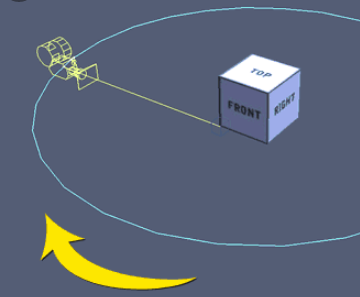